# Welcome to the Future of Healthcare BI Analytics at UHS 😉

By Matt Stammers
Date: 24/02/2024

This script was developed by me messing around with optimal environment setups for BI analysts. I have tried to strike the right balance between minimising complexity and maximising impact demonstrating the power of python to analyse a dataset. 

It is fully available under the licence on the repo to anyone who wants to take it, remix it or build upon it 😁. The point is to take it, learn as much as you can from it and then start to apply it to your own projects / work as that is the best way to learn.

In [1]:
# Import Required Dependencies

import pandas as pd
import datetime as dt
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import scipy 
import bokeh 
import sklearn
import streamlit
from ydata_profiling import ProfileReport

In [21]:
# Set Root Directory and Import Data

# This bit gets you one level above your current location within a notebook. To go 2 levels up substitute the 0 for a 1.
ROOT = Path(os.getcwd()).parents[0]

# This bit obtains the data
df=pd.read_csv(str(ROOT)+'/data/no_shows.zip')

# Basic Exploratory Data Analysis (EDA) with Matplotlib

Here is how to explore some data using matplotlib, seaborne and bokeh

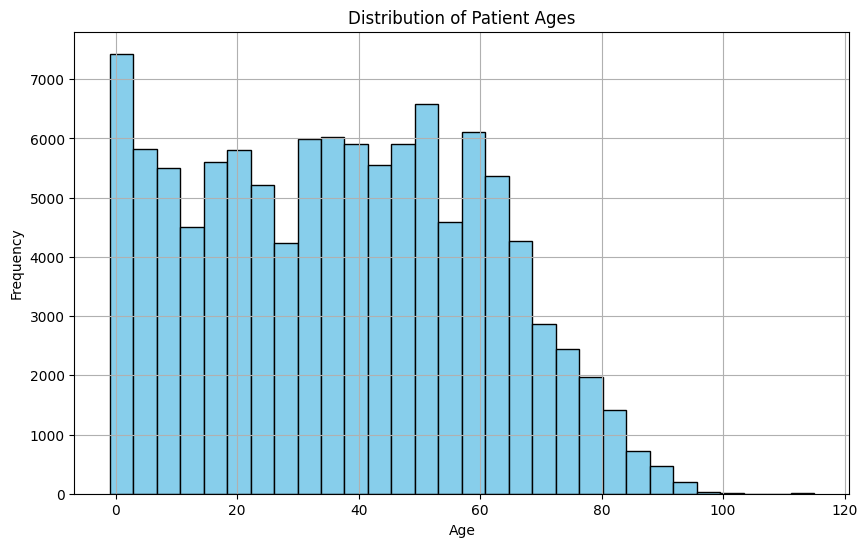

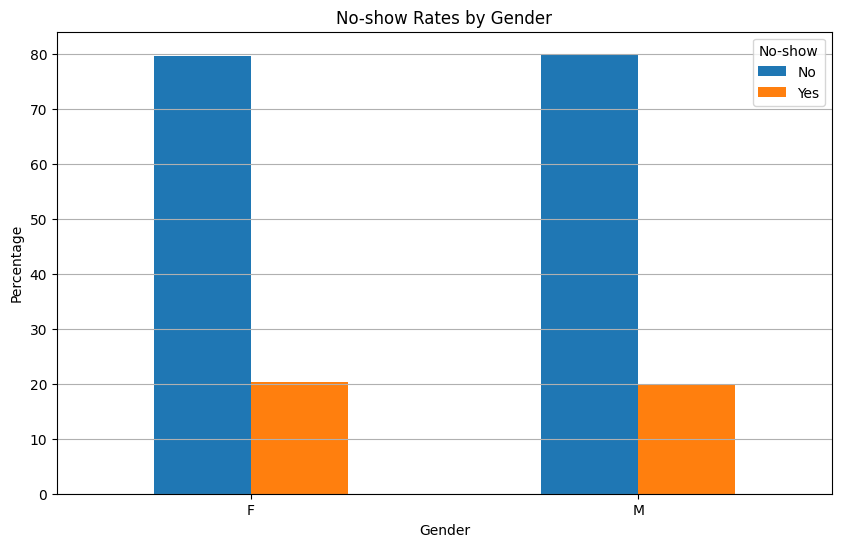

In [25]:
# Matplotlib

# Distribution of Ages
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
# Save the figure
plt.savefig('figures/distribution_of_patient_ages.png', format='png', dpi=600)
plt.show()

# No-show rates by gender
no_show_rates = df.groupby('Gender')['No-show'].value_counts(normalize=True).unstack() * 100
no_show_rates.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('No-show Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='No-show')
plt.grid(axis='y')
# Save the figure
plt.savefig('figures/no_show_rates_by_gender.png', format='png', dpi=600)
plt.show()


# Y Data Profiler

It would take ages to plot the entire dataset using matplotlib - so instead there is another clever tool which can help us speed this process along significantly. Watch below

In [33]:
# First fix the dates as they are currently objects
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# Convert 'Gender' to a binary format where 'F' = 1 and 'M' = 0
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)

# Convert 'No-show' to a binary format where 'Yes' = 1 and 'No' = 0
df['No-show'] = df['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  int64              
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [34]:
# Profile the data inline

profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
# Or export 

profile.to_file("reports/data_profile.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Seaborn

This is a statistical plotting library allowing for more complex exploratory data analysis

In [37]:
# First we Need to Create a set of Analysis Ready Float Only Data Cuts
df1 = df[['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']]
df2 = df[['Gender', 'Age', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']]

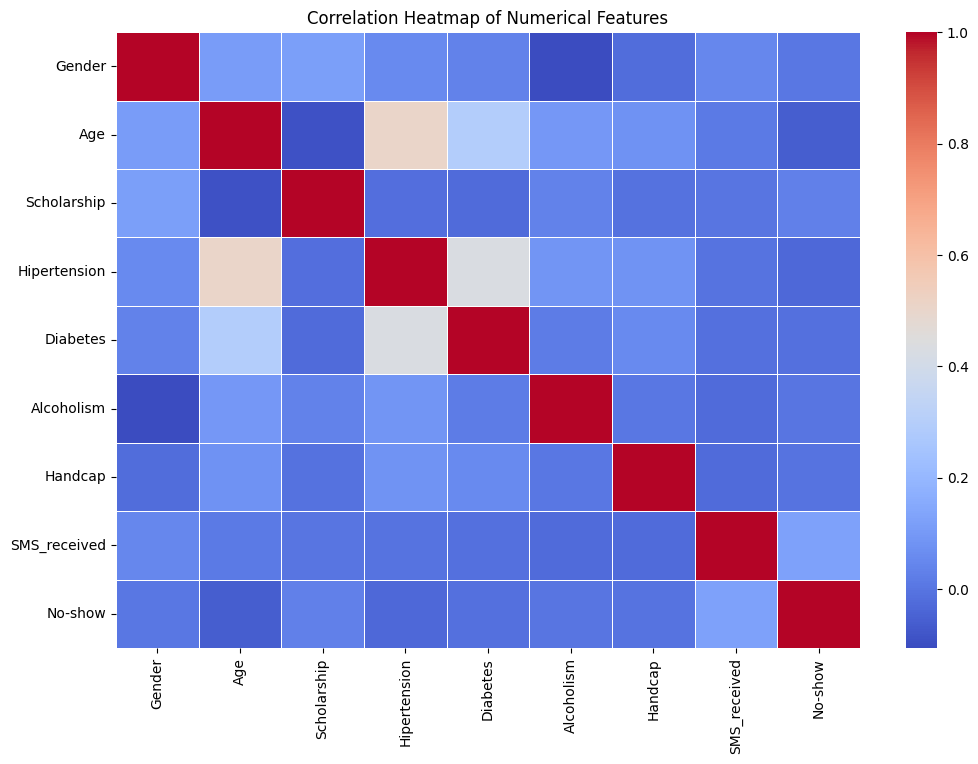

In [38]:
# Seaborn Heatmap 

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('figures/correlation_heatmap_of_numerical_features.png', format='png', dpi=600)
plt.show()

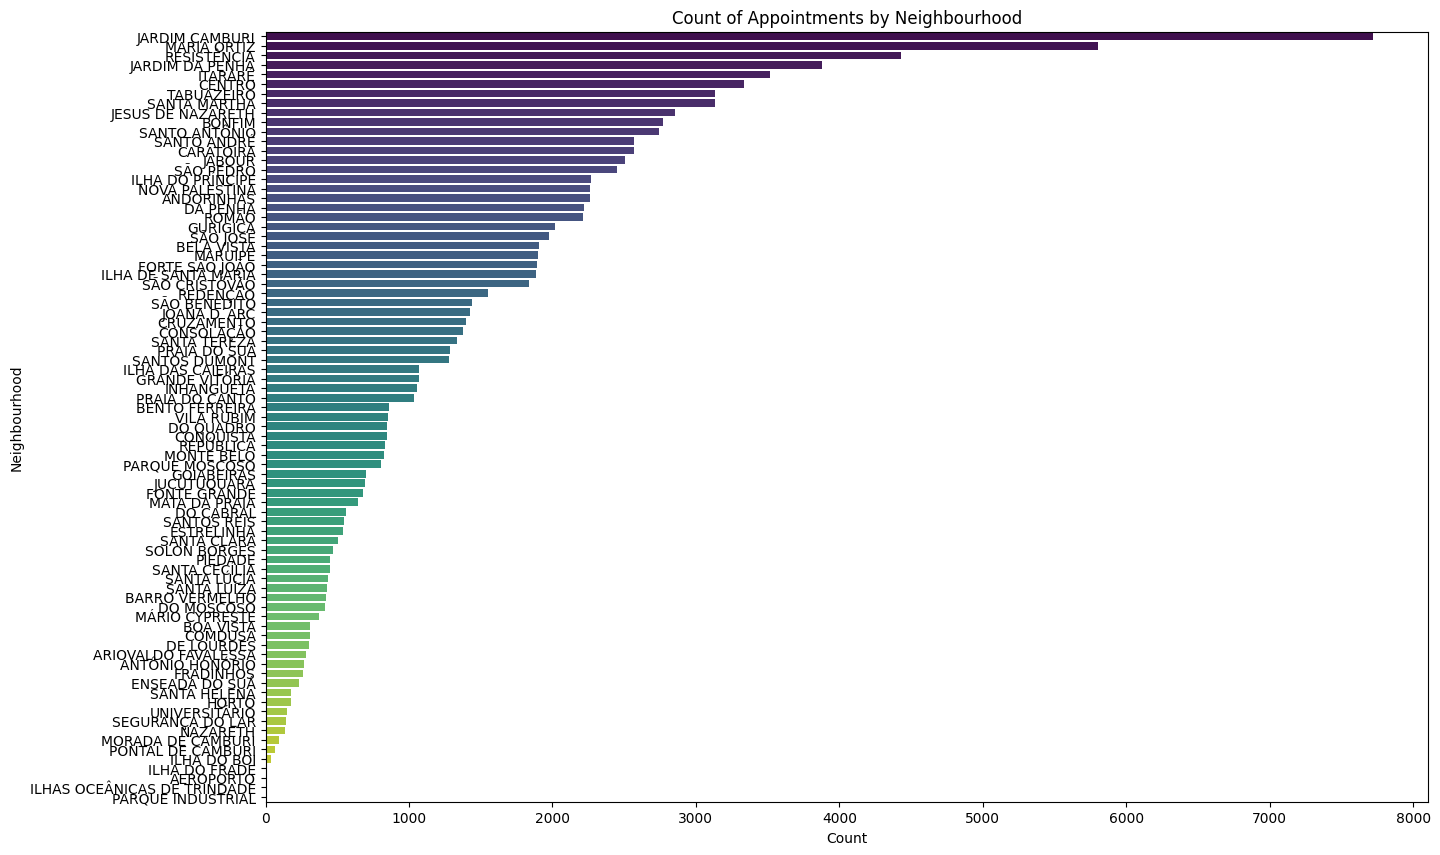

In [39]:
# Count of appointments by neighbourhood
plt.figure(figsize=(15, 10))
sns.countplot(y='Neighbourhood', data=df, order=df['Neighbourhood'].value_counts().index, palette='viridis')
plt.title('Count of Appointments by Neighbourhood')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.savefig('figures/count_of_appointments_by_neighbourhood.png', format='png', dpi=600)
plt.show()

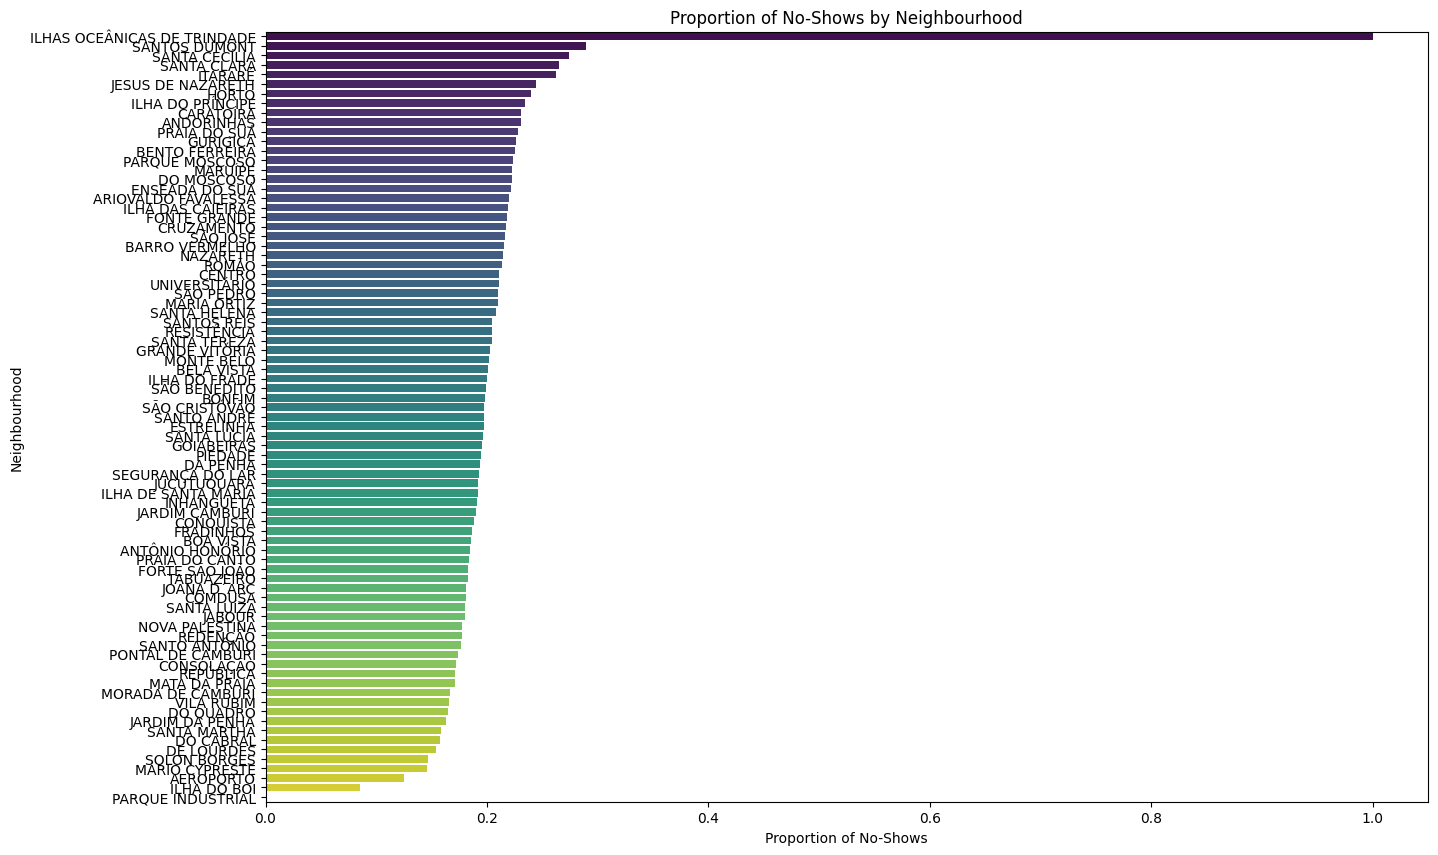

In [41]:
# Group by 'Neighbourhood' and calculate the mean of 'No Show' to get the proportion of no-shows
proportions = df.groupby('Neighbourhood')['No-show'].mean().reset_index()

# Sort the proportions for better visualization
proportions_sorted = proportions.sort_values(by='No-show', ascending=False)

# Now, plot the proportions
plt.figure(figsize=(15, 10))
sns.barplot(y='Neighbourhood', x='No-show', data=proportions_sorted, palette='viridis')
plt.title('Proportion of No-Shows by Neighbourhood')
plt.xlabel('Proportion of No-Shows')
plt.ylabel('Neighbourhood')
plt.savefig('figures/proportion_of_no_shows_by_neighbourhood.png', format='png', dpi=600)
plt.show()

# Assessing the Outlier

Why did this place have a 100% DNA rate? See below to find out

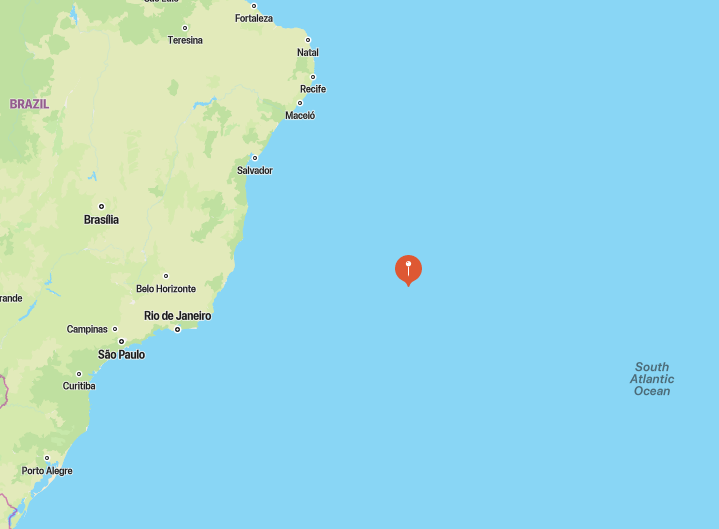

In [42]:
from IPython.display import Image, display

# Display an image file
display(Image(filename='images/Island.png'))

# Bokeh

Now for more complex plotting

In [41]:
# Bokeh

# Convert 'ScheduledDay' and 'AppointmentDay' to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.month
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.month

df3 = df[['ScheduledDay', 'AppointmentDay','Age', 'Sex', 'Scholarship',	'Hipertension',	'Diabetes',	'Alcoholism',	'Handcap',	'SMS_received',	'No Show']]

In [43]:
from bokeh.models import ColorBar, LinearColorMapper, BasicTicker
from bokeh.plotting import figure, show
from bokeh.transform import transform

# Calculate correlation matrix
corr_matrix = df3.corr()

# Prepare data for Bokeh
corr_df = corr_matrix.stack().reset_index(name='correlation')
corr_df['correlation'] = corr_df['correlation'].round(2)

# Bokeh plot setup
mapper = LinearColorMapper(palette='Viridis256', low=corr_df['correlation'].min(), high=corr_df['correlation'].max())

p = figure(width=800, height=800, title="Feature Correlations with No-shows",
           x_range=list(corr_matrix.index), y_range=list(reversed(corr_matrix.columns)),
           toolbar_location=None, tools='', x_axis_location="above")

p.rect(x='level_0', y='level_1', width=1, height=1, source=corr_df,
       line_color=None, fill_color=transform('correlation', mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(corr_matrix.columns)))

p.add_layout(color_bar, 'right')

p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "10pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0

show(p)


In [47]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, NumeralTickFormatter
from datetime import datetime
import pandas as pd

# Ensure output is rendered in the notebook
output_notebook()

# Simulating data for demonstration purposes
# Let's assume 'df' is your DataFrame after initial preprocessing
data = {'AppointmentDay': [datetime(2022, 1, 1), datetime(2022, 1, 2), datetime(2022, 1, 3), datetime(2022, 1, 4)],
        'No_show_rate': [0.1, 0.2, 0.15, 0.05]}
daily_no_show = pd.DataFrame(data)

# Convert 'AppointmentDay' to datetime if not already
daily_no_show['AppointmentDay'] = pd.to_datetime(daily_no_show['AppointmentDay'])

# Creating a ColumnDataSource from the DataFrame
source = ColumnDataSource(daily_no_show)

# Creating the plot
p = figure(plot_width=800, plot_height=400, x_axis_type="datetime", title="Daily No-Show Rates Over Time")
p.line('AppointmentDay', 'No_show_rate', source=source, line_width=2, color='navy')
p.circle('AppointmentDay', 'No_show_rate', source=source, size=8, color='red', legend_label='No-Show Rate')

# Formatting the plot
p.xaxis.axis_label = "Appointment Day"
p.yaxis.axis_label = "No-Show Rate"
p.yaxis.formatter = NumeralTickFormatter(format="0.0%")

# Show the plot
show(p)


Loading BokehJS ...

AttributeError: unexpected attribute 'plot_width' to figure, similar attributes are outer_width, width or min_width